In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

import pandas as pd
import seaborn as sns

from PIL import Image

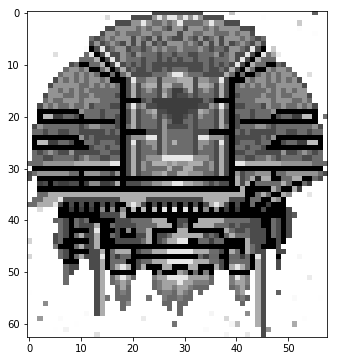

In [11]:
# obtenemos la imagen para poder trabajarla
img = Image.open('/home/barbara/Documentos/taller/monstruolevel3.bmp')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

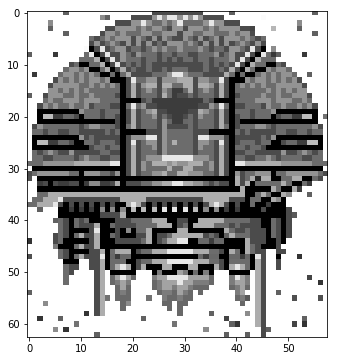

In [12]:
# llevamos la imagen a una representacion matricial con numpy 
# para poder operar
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
# realizamos el plot a partir de la matriz (no la imagen)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

In [13]:
imgmat

matrix([[255., 255., 255., ...,  97., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]])

In [14]:
# realizamos la descomposicion en valores singulares
u, s, v = np.linalg.svd(imgmat)

In [15]:
u

matrix([[-0.17401427, -0.07843776,  0.15729691, ..., -0.10354625,
          0.01056455,  0.0533537 ],
        [-0.17235571, -0.01686693,  0.13718732, ...,  0.09962279,
         -0.11779179, -0.03297081],
        [-0.1623839 , -0.03504877,  0.13392096, ...,  0.08280332,
          0.06590015, -0.0506544 ],
        ...,
        [-0.18457895, -0.18817774, -0.01239449, ...,  0.07331529,
         -0.02678213, -0.01751577],
        [-0.19152002, -0.15559269, -0.02050417, ...,  0.03368306,
          0.05306592, -0.07965861],
        [-0.19447972, -0.15327381,  0.01391695, ...,  0.17935227,
         -0.01606732,  0.13740125]])

In [8]:
# verificamos los valores singulares
s

array([9.43415179e+03, 2.01744585e+03, 1.54432753e+03, 1.08931587e+03,
       1.04620196e+03, 8.20270233e+02, 7.98682717e+02, 7.31122187e+02,
       6.98498187e+02, 6.74165181e+02, 6.34649838e+02, 5.83741628e+02,
       5.58113250e+02, 5.37164189e+02, 5.35784828e+02, 5.03881777e+02,
       4.91313798e+02, 4.60981578e+02, 4.42004122e+02, 4.24180395e+02,
       4.20198112e+02, 3.81519831e+02, 3.80711175e+02, 3.74712269e+02,
       3.52614728e+02, 3.46572056e+02, 3.19419557e+02, 3.01496880e+02,
       2.94933416e+02, 2.78854117e+02, 2.62073109e+02, 2.48237695e+02,
       2.34357115e+02, 2.30970382e+02, 2.02169295e+02, 1.99587410e+02,
       1.90935067e+02, 1.80877010e+02, 1.80096672e+02, 1.64118642e+02,
       1.59284077e+02, 1.41692734e+02, 1.28613826e+02, 1.26219419e+02,
       1.19810907e+02, 1.13561555e+02, 1.03585250e+02, 9.45041463e+01,
       8.78164306e+01, 7.44296278e+01, 7.25991907e+01, 5.92051349e+01,
       5.15239675e+01, 4.52574408e+01, 3.11757409e+01, 2.31762064e+01,
      

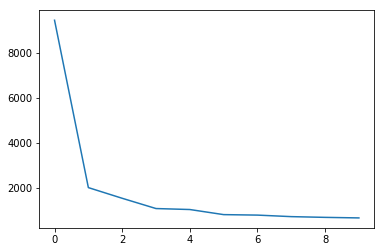

In [9]:
# realizamos un plot de los valores singulaes
# es interesante ir reduciendo el rango para poder 
# verificar algun posible 'codo' para poder considerar 
# la dimensionalidad intrinseca de los datos
#plt.plot(s)
plt.plot(s[:10])

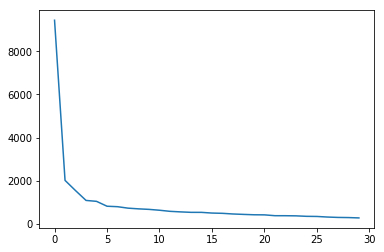

In [10]:

plt.plot(s[:30])

In [11]:
# calculo de energia
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print(energy_percentage)

[8.47232327e+01 3.87436537e+00 2.27026015e+00 1.12954740e+00
 1.04190436e+00 6.40487566e-01 6.07219029e-01 5.08834707e-01
 4.64437593e-01 4.32642756e-01 3.83411511e-01 3.24368094e-01
 2.96511448e-01 2.74669795e-01 2.73260980e-01 2.41687453e-01
 2.29781320e-01 2.02285121e-01 1.85972804e-01 1.71276580e-01
 1.68075725e-01 1.38557817e-01 1.37971075e-01 1.33657282e-01
 1.18358021e-01 1.14336235e-01 9.71224897e-02 8.65291516e-02
 8.28027502e-02 7.40203138e-02 6.53795190e-02 5.86586766e-02
 5.22821077e-02 5.07819512e-02 3.89069507e-02 3.79195420e-02
 3.47030940e-02 3.11432219e-02 3.08750858e-02 2.56396816e-02
 2.41513564e-02 1.91113761e-02 1.57460677e-02 1.51652354e-02
 1.36643667e-02 1.22760729e-02 1.02139243e-02 8.50155809e-03
 7.34088400e-03 5.27337303e-03 5.01718782e-03 3.33668761e-03
 2.52705908e-03 1.94974037e-03 9.25188798e-04 5.11306720e-04
 3.38147694e-04 7.30969574e-05]


In [12]:
# realizamos entonces el calculo de cuanta energia se va
# acumulando con cada uno de los 
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 9434.151785790451 84.72%
Number of Singular Values 2: 2017.4458519271034 88.6%
Number of Singular Values 3: 1544.32752884068 90.87%
Number of Singular Values 4: 1089.3158672991124 92.0%
Number of Singular Values 5: 1046.2019565241426 93.04%
Number of Singular Values 6: 820.2702334168395 93.68%
Number of Singular Values 7: 798.6827171936782 94.29%
Number of Singular Values 8: 731.1221873368663 94.8%
Number of Singular Values 9: 698.4981870719491 95.26%
Number of Singular Values 10: 674.1651809292831 95.69%
Number of Singular Values 11: 634.6498383458091 96.08%
Number of Singular Values 12: 583.7416280224038 96.4%
Number of Singular Values 13: 558.1132500400957 96.7%
Number of Singular Values 14: 537.1641890581728 96.97%
Number of Singular Values 15: 535.7848279633905 97.25%
Number of Singular Values 16: 503.8817771743144 97.49%
Number of Singular Values 17: 491.31379758164024 97.72%
Number of Singular Values 18: 460.98157778330346 97.92%
Number of Singular V

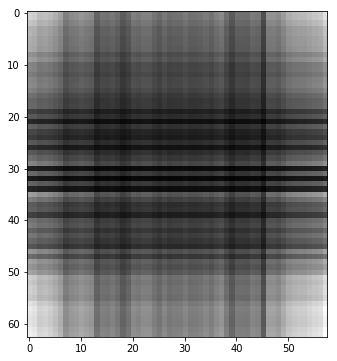

In [13]:
# reconstruimos la imagen

reconstimg = np.matrix(u[:, :1]) * np.diag(s[:1]) * np.matrix(v[:1, :])
plt.figure(figsize=(9,6))
plt.imshow(reconstimg, cmap='gray');

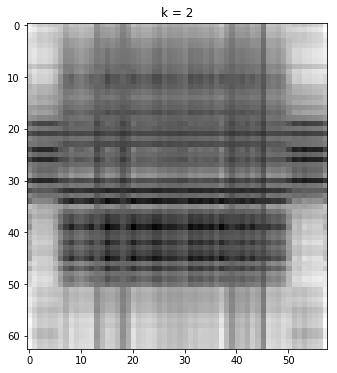

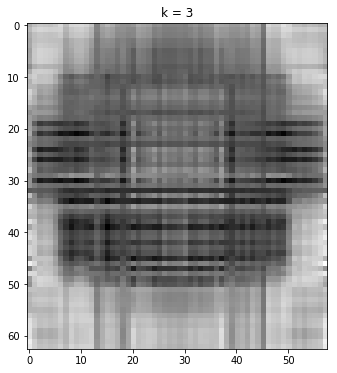

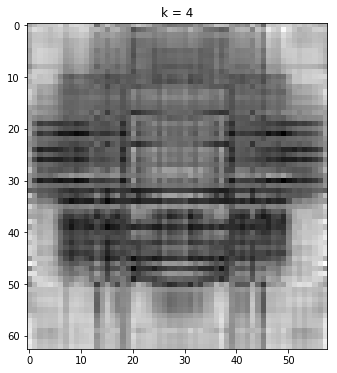

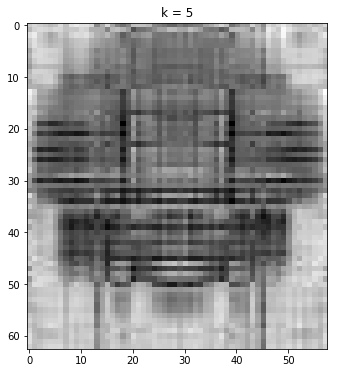

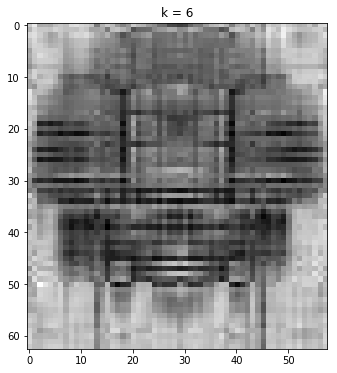

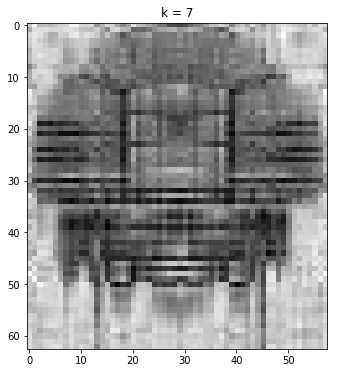

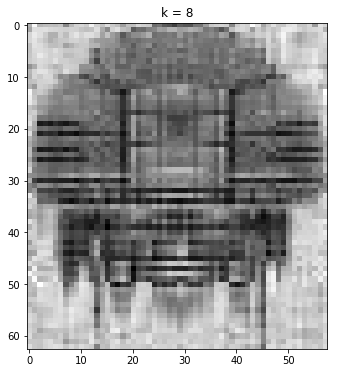

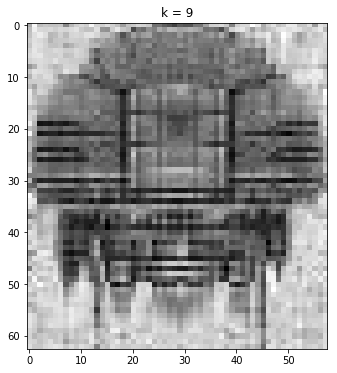

In [16]:
for i in range(2, 10):
    reconstimg = np.matrix(u[:, :i]) * np.diag(s[:i]) * np.matrix(v[:i, :])
    plt.figure(figsize=(9,6))
    plt.imshow(reconstimg, cmap='gray')
    title = "k = %s" % i
    plt.title(title)
    plt.show()

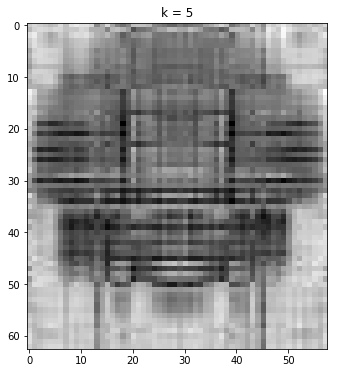

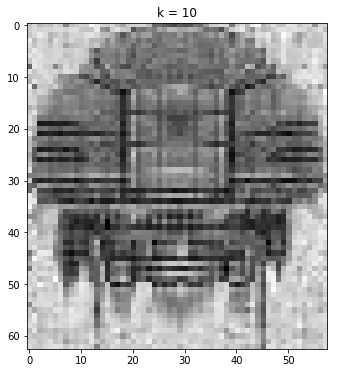

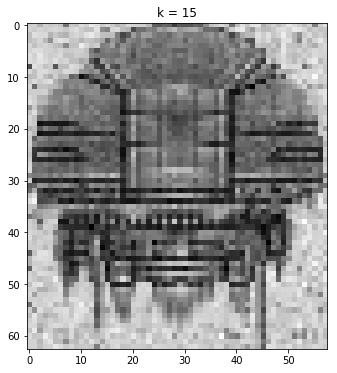

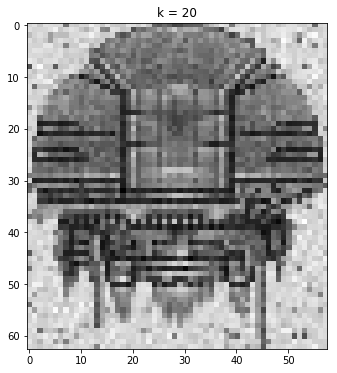

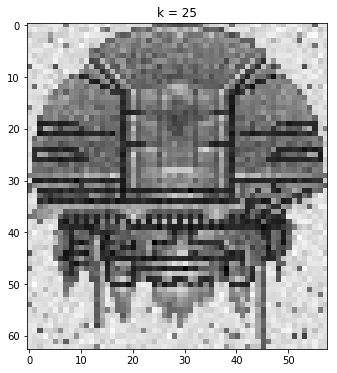

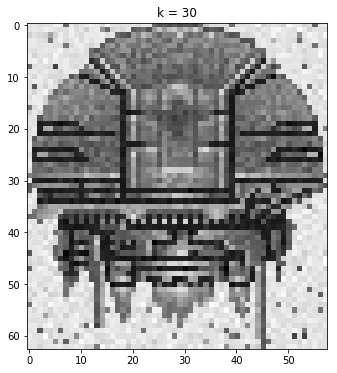

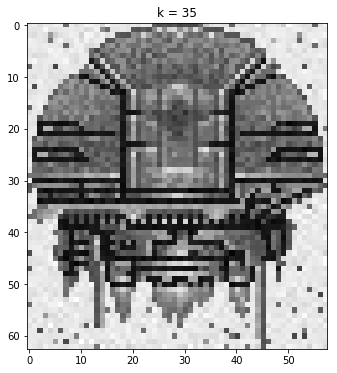

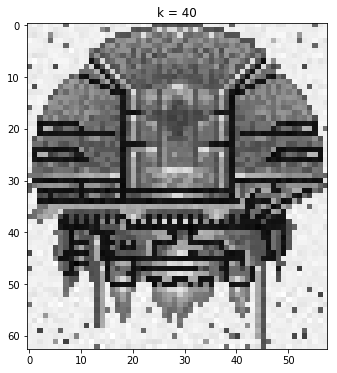

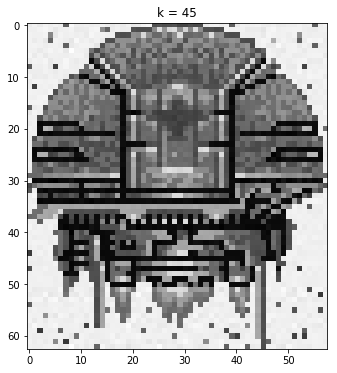

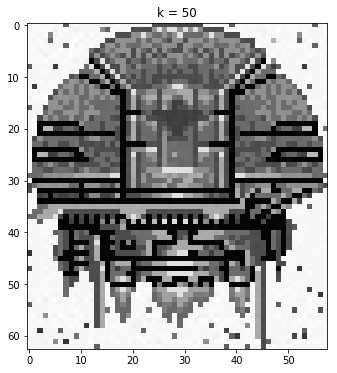

In [17]:
for i in range(5, 51, 5):
    reconstimg = np.matrix(u[:, :i]) * np.diag(s[:i]) * np.matrix(v[:i, :])
    plt.figure(figsize=(9,6))
    plt.imshow(reconstimg, cmap='gray')
    title = "k = %s" % i
    plt.title(title)
    plt.show()

### SVD: Singular Values Decomposition

In [19]:
iris = sns.load_dataset("iris")
print(iris.shape)
print(type(iris))
iris.head()

(150, 5)
<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [21]:
iris.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
iris['species'].value_counts()


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

/home/barbara/.local/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


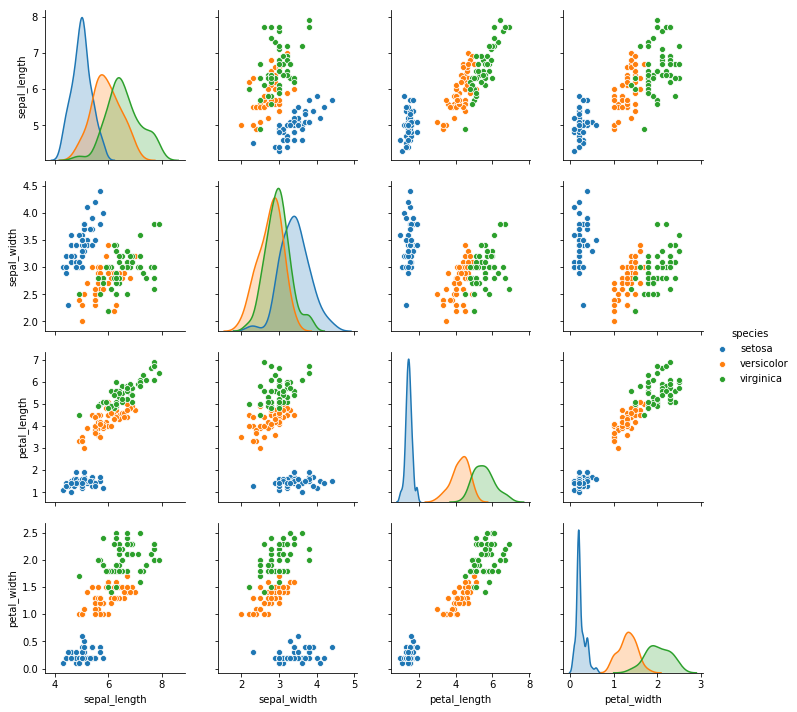

In [23]:
g = sns.pairplot(iris, hue="species")


In [24]:
#Calculando la descomposicion SVD con scipy

# usaremos la implementacion base de svd
from scipy.linalg import svd # https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html
# por otro lado hay otras opciones como svds 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.svds.html 
from scipy.sparse.linalg import svds
# la usaremos para verificar el calculo de autovalores/eigenvalues
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigs.html
from scipy.sparse.linalg import eigs


In [25]:
## normalizamos/centramos utilizando la media de tal forma que el promedio sea 0
centered = ((iris).iloc[:,:-1]) - iris.mean()

In [26]:
# 150 filas x 4 columnas
print(centered.shape)

(150, 4)


In [27]:
# calculamos la svd
u, s, vt = svd(centered)

In [35]:
s

array([25.09996044,  6.01314738,  3.41368064,  1.88452351])

In [28]:
pd.DataFrame(s)

,0
0,25.099960
1,6.013147
2,3.413681
3,1.884524


In [29]:
# utilizando otro metodo de scipy podemos realizar el calculo
# de autovalores para verificar
np.sqrt(eigs(centered.values.dot(centered.values.T), k=4)[0]).real

array([25.09996044,  6.01314738,  3.41368064,  1.88452351])

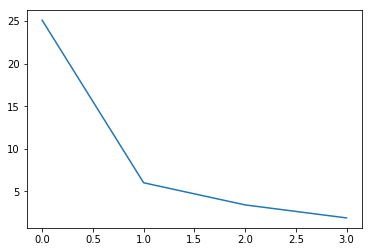

In [30]:
plt.plot(s)


Podemos entonces llegar a la siguientes conclusiones
La dimensionalidad intrinseca de nuestros datos teniendo un codo en el 2 y 3er valor singular, puede estar 2 o 3.
eliminando el ultimo valor singular perdemos muy poco.

In [31]:
# calculo de energia de la matriz 
singular_values = s
# el calculo total de la energia es igual a la suma 
# de los valores singulares al cuadrado
energy_total = sum(singular_values**2)
# de esta forma calculamos la cantidad de energia acumulada por
# cada valor singular
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print(energy_percentage)

[92.46187232  5.30664831  1.71026098  0.52121839]


In [32]:
energy_total

681.3706000000004

In [33]:
singular_values

array([25.09996044,  6.01314738,  3.41368064,  1.88452351])

In [34]:
# realizamos entonces el calculo de cuanta energia se va
# acumulando con cada uno de los 
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 25.09996044218387 92.46%
Number of Singular Values 2: 6.013147382308735 97.77%
Number of Singular Values 3: 3.413680639192102 99.48%
Number of Singular Values 4: 1.8845235082226928 100.0%


Podemos entonces llegar a la siguientes conclusiones
Utilizando los dos primeros valores singulares vamos a estar reteniendo el 97.77% de la varianza original de los datos en 4 dimensiones. Es decir con solo 2 vectores de la base V podemos capturar un 97.77 de la matriz.
Es posible reducir a una unica dimension los datos reteniendo el 92.46% de varianza original de los datos en 4 dimensiones.
Tomando 3 valores singulares, podemos capturar casi la totalidad de la energia de la matriz.

Reducción de dimensiones usando la SVD


In [37]:
# tomando los dos primeros vectores de la base V podemos realizar la 
# siguiente reconstruccion de iris
k = 3
reconstiris = np.matrix(u[:, :k]) * np.diag(s[:k]) * np.matrix(vt[:k, :])

In [38]:
# tener en cuenta que tenemos una dimension que quitamos al principio que 
# es la que indica la categoria
reconstiris.shape

(150, 4)

In [39]:
# podemos verificar el desvio estandard que tenemos en la reconstruccion
np.std(centered - reconstiris)

sepal_length    0.048544
sepal_width     0.049196
petal_length    0.073833
petal_width     0.115966
dtype: float64

In [41]:
# reconstruimos el data frame en el formato de iris
iris_svd = pd.DataFrame(reconstiris, index=iris.index, columns=('sepal_length','sepal_width','petal_length','petal_width'))
# aplicamos los labels a cada uno de los features
iris_svd['species'] = iris['species']

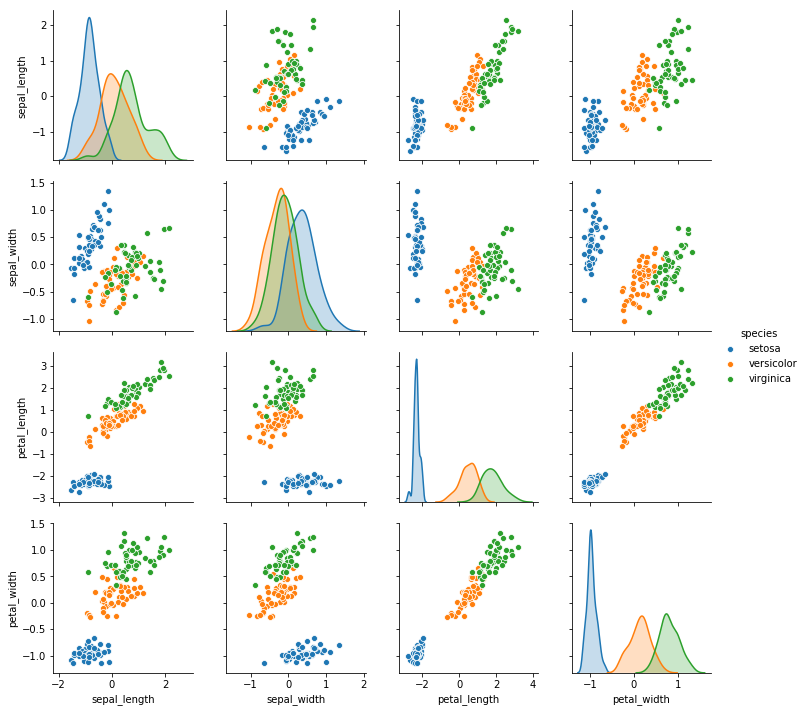

In [42]:
# realizamos un pairplot a partir de los datos reducidos
g = sns.pairplot(iris_svd, hue="species")

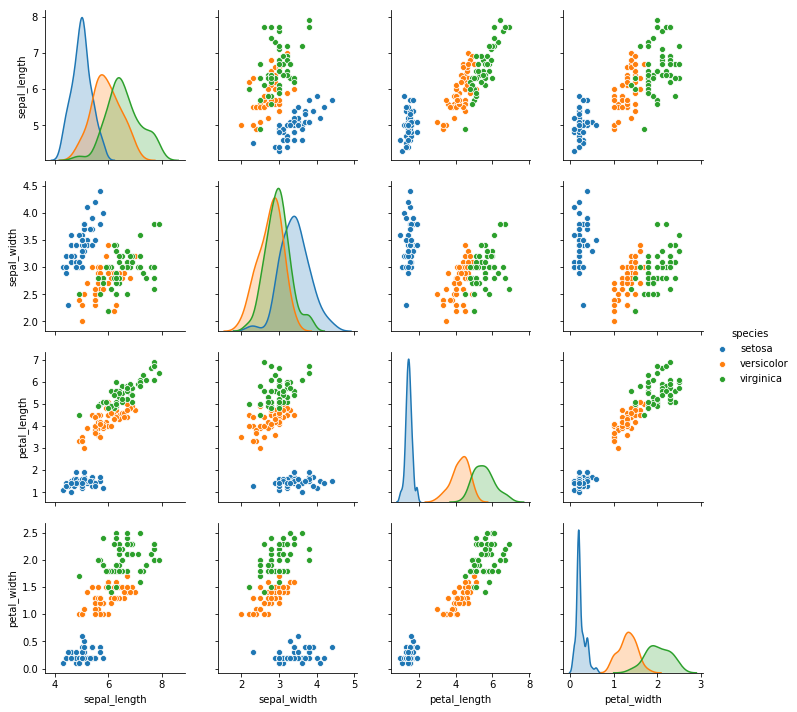

In [43]:
# realizamos un pairplot de los datos originales para comparar
g = sns.pairplot(iris, hue="species")

Nota: 'Reduced' o 'Truncated' SVD
La misma se puede usar desde scipy y permite calcular una descomposicion hasta el k-esimo valor singular.
Son computacionalmente menos costosas.
Hay que tener alguna consideraciones para operar con sus matrices.

In [33]:

M=[[0,1337,938,840,647,748,984,578,987,800,2505], [1337,0,749,1005,810,1017,1026,1385,1661,1860,3068],[938,749,0,262,825,1116,1271,1297,1693,1687,2978],[840,1005,262,0,920,1198,1385,1296,1712,1630,2919], [647,810,825,920,0,291,467,579,909,1051,2284],[748,1017,1116,1198,291,0,236,414,648,887,2051], [984,1026,1271,1385,467,236,0,586,677,1022,2083], [578,1385,1297,1296,579,414,586,0,421,480,1713], [987,1661,1693,1712,909,648,677,421,0,479,1412], [800,1860,1687,1630,1051,887,1022,480,479,0,1292], [2505,3068,2978,2919,2284,2051,2083,1713,1412,1292,0]]

In [55]:
M

[[0, 1337, 938, 840, 647, 748, 984, 578, 987, 800, 2505],
 [1337, 0, 749, 1005, 810, 1017, 1026, 1385, 1661, 1860, 3068],
 [938, 749, 0, 262, 825, 1116, 1271, 1297, 1693, 1687, 2978],
 [840, 1005, 262, 0, 920, 1198, 1385, 1296, 1712, 1630, 2919],
 [647, 810, 825, 920, 0, 291, 467, 579, 909, 1051, 2284],
 [748, 1017, 1116, 1198, 291, 0, 236, 414, 648, 887, 2051],
 [984, 1026, 1271, 1385, 467, 236, 0, 586, 677, 1022, 2083],
 [578, 1385, 1297, 1296, 579, 414, 586, 0, 421, 480, 1713],
 [987, 1661, 1693, 1712, 909, 648, 677, 421, 0, 479, 1412],
 [800, 1860, 1687, 1630, 1051, 887, 1022, 480, 479, 0, 1292],
 [2505, 3068, 2978, 2919, 2284, 2051, 2083, 1713, 1412, 1292, 0]]

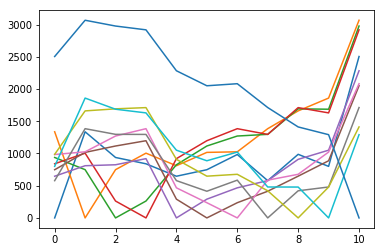

In [78]:
plt.plot(M)

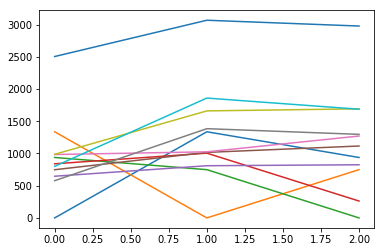

In [60]:
plt.plot(M[:3])

In [34]:
ciudades = np.matrix(M)

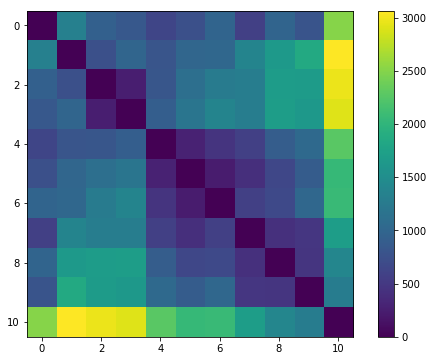

In [35]:
plt.figure(figsize=(9,6))
plt.imshow(ciudades)
plt.colorbar()

In [82]:
ciudadesCuadrado=ciudades**2


In [83]:
promedio = ciudadesCuadrado.mean(0)
promedio

matrix([[13066701.        , 16500827.72727273, 15219252.        ,
         15523287.45454546, 11374620.27272727, 11181721.27272727,
         12303094.54545454, 11031692.09090909, 12570534.81818182,
         12924695.63636364, 22514903.18181818]])

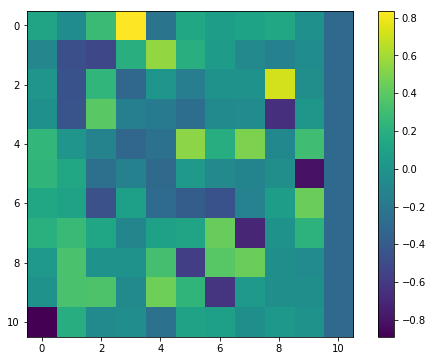

In [87]:
ciudadesCentrado = ciudadesCuadrado - promedio
u, s, v = np.linalg.svd(ciudadesCentrado)
plt.figure(figsize=(9,6))
plt.imshow(u)
plt.colorbar()


In [63]:
ciudadesCentrado

matrix([[-9.42181818e+02,  7.17272727e+01, -2.27090909e+02,
         -3.57000000e+02, -1.51454545e+02, -3.43636364e+01,
          9.88181818e+01, -2.17363636e+02,  2.34545455e+01,
         -2.17090909e+02,  4.77272727e+02],
        [ 3.94818182e+02, -1.26527273e+03, -4.16090909e+02,
         -1.92000000e+02,  1.15454545e+01,  2.34636364e+02,
          1.40818182e+02,  5.89636364e+02,  6.97454545e+02,
          8.42909091e+02,  1.04027273e+03],
        [-4.18181818e+00, -5.16272727e+02, -1.16509091e+03,
         -9.35000000e+02,  2.65454545e+01,  3.33636364e+02,
          3.85818182e+02,  5.01636364e+02,  7.29454545e+02,
          6.69909091e+02,  9.50272727e+02],
        [-1.02181818e+02, -2.60272727e+02, -9.03090909e+02,
         -1.19700000e+03,  1.21545455e+02,  4.15636364e+02,
          4.99818182e+02,  5.00636364e+02,  7.48454545e+02,
          6.12909091e+02,  8.91272727e+02],
        [-2.95181818e+02, -4.55272727e+02, -3.40090909e+02,
         -2.77000000e+02, -7.98454545e+02, -

In [88]:
u

matrix([[ 0.1175062 , -0.04938939,  0.28587986,  0.83731775, -0.2246218 ,
          0.13888605,  0.07982648,  0.11523383,  0.14130122, -0.02557659,
         -0.30151134],
        [-0.09276512, -0.46581597, -0.51814552,  0.19657344,  0.55778247,
          0.19233777,  0.05861293, -0.07487441, -0.12913999, -0.05050981,
         -0.30151134],
        [ 0.00884238, -0.45360587,  0.24753519, -0.31232361,  0.01590418,
         -0.15107664, -0.01207596, -0.00739786,  0.72109796, -0.03427534,
         -0.30151134],
        [-0.02406225, -0.44155072,  0.39430857, -0.14479497, -0.17685584,
         -0.2663795 , -0.06052366, -0.05447165, -0.65399497,  0.02289819,
         -0.30151134],
        [ 0.25282314,  0.01105585, -0.11501269, -0.3203285 , -0.23559117,
          0.53987173,  0.18659375,  0.49806175, -0.08045077,  0.30478045,
         -0.30151134],
        [ 0.23838053,  0.1417819 , -0.25051554, -0.12887315, -0.2936478 ,
          0.03816149, -0.07601726, -0.11345203, -0.03577235, -0.8032323

In [89]:
df = pd.DataFrame(u)


In [96]:
df.plot.scatter((0, 1337, 938, 840, 647, 748, 984, 578, 987, 800, 2505),0)

KeyError: (0, 1337, 938, 840, 647, 748, 984, 578, 987, 800, 2505)

TypeError: scatter() takes at least 2 arguments (1 given)

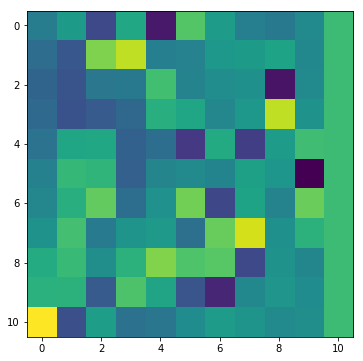

In [50]:
plt.figure(figsize=(9,6))
plt.imshow(u)
plt.scatter(u)
plt.colorbar()

In [5]:
##
A = [[71,23,136,38],[23,53,74,22],[136,74,261,20],[38,22,20,16]]

In [6]:
matrizA = np.matrix(A)
#matrizA = matrizA * 0.3333333 
matrizA

matrix([[ 71,  23, 136,  38],
        [ 23,  53,  74,  22],
        [136,  74, 261,  20],
        [ 38,  22,  20,  16]])

In [7]:
np.cov(matrizA)

array([[ 2518.        ,   742.66666667,  4905.66666667,    33.33333333],
       [  742.66666667,   634.        ,  1897.        ,   -85.33333333],
       [ 4905.66666667,  1897.        , 10740.91666667,   184.        ],
       [   33.33333333,   -85.33333333,   184.        ,    93.33333333]])

In [1]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(matrizA)
principalComponents

array([[ 1.05491659e+01, -2.02022452e+01,  1.63751913e+01,
         2.17214656e-15],
       [-6.04095919e+01,  2.66233259e+01,  7.64475125e+00,
         2.17214656e-15],
       [ 1.57346329e+02,  4.27155492e+00, -8.65730542e+00,
         2.17214656e-15],
       [-1.07485903e+02, -1.06926356e+01, -1.53626371e+01,
         2.17214656e-15]])

In [13]:
u, s, v = np.linalg.svd(matrizA)

In [14]:
# calculo de energia
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print(energy_percentage)

[97.58196801  1.19497089  0.73226437  0.49079672]


In [15]:
# realizamos entonces el calculo de cuanta energia se va
# acumulando con cada uno de los 
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 356.0117121052012 97.58%
Number of Singular Values 2: 39.396547387523995 98.78%
Number of Singular Values 3: 30.83993483881826 99.51%
Number of Singular Values 4: 25.24819433154342 100.0%


In [17]:
u, s, v = np.linalg.svd(principalComponents)

In [18]:
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print(energy_percentage)

[9.55025841e+01 2.97795056e+00 1.51946535e+00 4.63755683e-32]


In [19]:
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 200.1791460298999 95.5%
Number of Singular Values 2: 35.34842046183237 98.48%
Number of Singular Values 3: 25.249726049870244 100.0%
Number of Singular Values 4: 4.411191308718481e-15 100.0%


	Sea la siguiente matriz de 5x4:
3	1	1	0
2	1	0	2
3	3	0	1
0	1	2	0
2	0	2	2

Calcular la SVD de la matriz y luego identificar la opción correcta entre las siguientes:

In [16]:
B = [[3,1,1,0],[2,1,0,2],[3,3,0,1],[0,1,2,0],[2,0,2,2]]
matrizB = np.matrix(B)

u, s, v = np.linalg.svd(matrizB)

In [30]:
u
#El vector principal de la base es [-0.77,-0.45,-0.25,-0.36] ??? :S

matrix([[-0.46968068,  0.00570064, -0.3083355 ,  0.77855809, -0.27954262],
        [-0.42262917,  0.06403416,  0.54753326, -0.27696589, -0.66391373],
        [-0.62711442,  0.54488918, -0.19579499, -0.30929506,  0.41931393],
        [-0.14849486, -0.44030138, -0.68185617, -0.46931336, -0.31448545],
        [-0.43065233, -0.71070219,  0.31917556,  0.03491026,  0.45425676]])

In [6]:
s

array([6.45017782, 2.74947668, 2.13135033, 1.51424231])

In [7]:
v

matrix([[-0.77469931, -0.45303371, -0.25239228, -0.36180048],
        [ 0.13036423,  0.45976057, -0.83517948, -0.2722143 ],
        [ 0.10370242, -0.48328205, -0.48499616,  0.72143121],
        [ 0.60999341, -0.5914551 , -0.05959952, -0.52396259]])

In [18]:
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print(energy_percentage)

[74.29427492 13.49932506  8.11188257  4.09451745]


In [19]:
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 6.45017782373645 74.29%
Number of Singular Values 2: 2.7494766833239135 87.79%
Number of Singular Values 3: 2.131350331694416 95.91%
Number of Singular Values 4: 1.5142423100754845 100.0%


In [20]:
# El valor singular mas importante es 1.51 FALSO
#Como la matriz es positiva todos los elementos de la matriz "v" en la SVD también serán positivos. FALSO

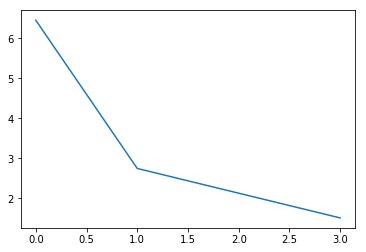

In [28]:
#Reduciendo la matriz a 2 dimensiones tres puntos del set original quedan muy juntos formando un cluster.
plt.plot(s)

Tenemos 6 usuarios que han calificado 4 películas. Representamos estos datos con la siguiente matriz de 6x4.
5	2	1	5
4	5	2	3
2	5	5	1
5	3	1	5
3	4	5	2
1	4	3	5

Calcular la matriz de distancias entre películas y la matriz de distancias entre usuarios, aplicar Multidimensional Scaling sobre ambas matrices y luego identificar la opción correcta entre las siguientes. Responder sobre el resultado de Multidimensional Scaling, no sobre la matriz de distancias!

In [31]:
C = [[5, 2, 1, 5],[4, 5, 2, 3],[2, 5, 5, 1],[5, 3, 1, 5 ],[3, 4, 5, 2],[1, 4, 3, 5]] #Usuarios contra pelis
matrizC = np.matrix(C)

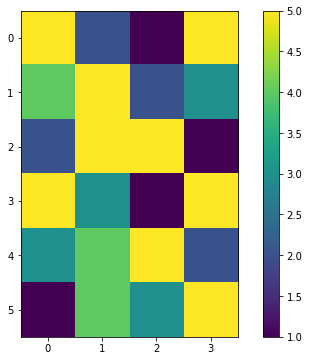

In [32]:
plt.figure(figsize=(9,6))
plt.imshow(matrizC)
plt.colorbar()

https://gist.github.com/javier2409/31b52edca5cf764611a17c8672504cf5